# USV/UAV Trajectory Analysis

This is the supplementary materials for CuRL-Transfer project.

CSV formate:
* Follow movingpandas examples (X, Y, t, trajectory_id, ...)
* Framerate: 10 fps
* TODO crs
* TODO overlay a background (geo image or other background?)


In [21]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString
import numpy as np

import sys
sys.path.append("..")
import movingpandas as mpd
# mpd.show_versions()

from datetime import datetime

import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt

## Reading CSVs

read csv into
1. wamvs: dictionary of GeoDataFrame
2. trajs: dictionary of Trajectory

In [22]:
boats = ['wamv1', 'wamv2', 'wamv3', 'wamv4', 'wamv5']
wamvs = {}
trajs = {}

for boat in boats:
    df = pd.read_csv('data/bory_boat/' + boat + '_gps.csv', delimiter=',')
    df['t'] = pd.to_datetime(df['t'], unit='ns')
    wamv = df[['X', 'Y', 'trajectory_id', 't']]
    wamv['geometry'] = df.apply(lambda row: Point(row['X'], row['Y']), axis=1)

    gdf = gpd.GeoDataFrame(wamv, geometry='geometry', crs='EPSG:4326')
    gdf = gdf.to_crs(epsg=32649) # Convert to UTM zone 49N for Taiwan

    trajs[boat] = mpd.Trajectory(gdf, 'trajectory_id', t='t')
    wamvs[boat] = gdf

In [23]:
wamvs['wamv1']

,X,Y,trajectory_id,t,geometry
0,150.673586,-33.724223,1,1970-01-01 00:14:14.154,POINT (4275762.746 -4535591.044)
1,150.673586,-33.724223,1,1970-01-01 00:14:14.200,POINT (4275762.743 -4535591.043)
2,150.673586,-33.724223,1,1970-01-01 00:14:14.267,POINT (4275762.742 -4535591.043)
3,150.673586,-33.724223,1,1970-01-01 00:14:14.333,POINT (4275762.741 -4535591.044)
4,150.673586,-33.724223,1,1970-01-01 00:14:14.400,POINT (4275762.741 -4535591.045)
...,...,...,...,...,...
6929,150.672633,-33.724587,1,1970-01-01 00:21:56.067,POINT (4275648.1 -4535590.628)
6930,150.672633,-33.724587,1,1970-01-01 00:21:56.133,POINT (4275648.1 -4535590.628)
6931,150.672633,-33.724587,1,1970-01-01 00:21:56.200,POINT (4275648.1 -4535590.628)
6932,150.672633,-33.724587,1,1970-01-01 00:21:56.267,POINT (4275648.1 -4535590.628)


## GeoPandas

In [24]:
merged_gdf = pd.concat([wamvs['wamv1'], wamvs['wamv2'], wamvs['wamv3'], wamvs['wamv4'], wamvs['wamv5']], axis=0)
merged_gdf

,X,Y,trajectory_id,t,geometry
0,150.673586,-33.724223,1,1970-01-01 00:14:14.154,POINT (4275762.746 -4535591.044)
1,150.673586,-33.724223,1,1970-01-01 00:14:14.200,POINT (4275762.743 -4535591.043)
2,150.673586,-33.724223,1,1970-01-01 00:14:14.267,POINT (4275762.742 -4535591.043)
3,150.673586,-33.724223,1,1970-01-01 00:14:14.333,POINT (4275762.741 -4535591.044)
4,150.673586,-33.724223,1,1970-01-01 00:14:14.400,POINT (4275762.741 -4535591.045)
...,...,...,...,...,...
6927,150.672736,-33.724567,5,1970-01-01 00:21:56.067,POINT (4275659.423 -4535593.027)
6928,150.672736,-33.724567,5,1970-01-01 00:21:56.133,POINT (4275659.423 -4535593.027)
6929,150.672736,-33.724567,5,1970-01-01 00:21:56.200,POINT (4275659.423 -4535593.027)
6930,150.672736,-33.724567,5,1970-01-01 00:21:56.267,POINT (4275659.423 -4535593.027)


## MovingPandas

documentation : https://movingpandas.readthedocs.io/en/main/trajectorycollection.html

### speed 

In [25]:
traj_collection = mpd.TrajectoryCollection(merged_gdf, 'trajectory_id', t='t')
traj_collection.add_speed()

TrajectoryCollection with 5 trajectories

In [26]:
traj_collection.get_max('speed')

np.float64(1.1122595228350776)

<Axes: >

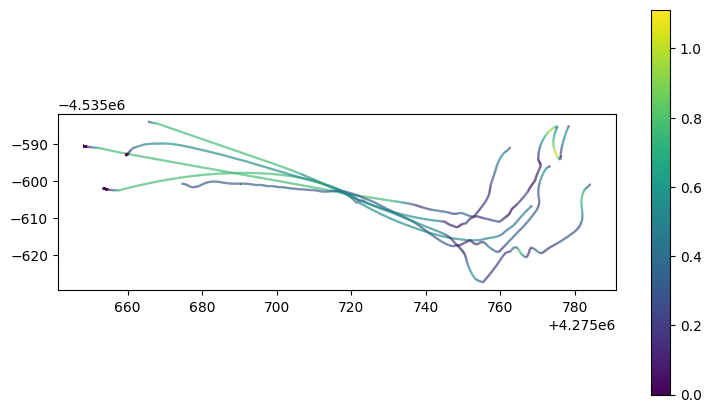

In [27]:
traj_collection.plot(column='speed', legend=True, figsize=(9,5))

## direction

<Axes: >

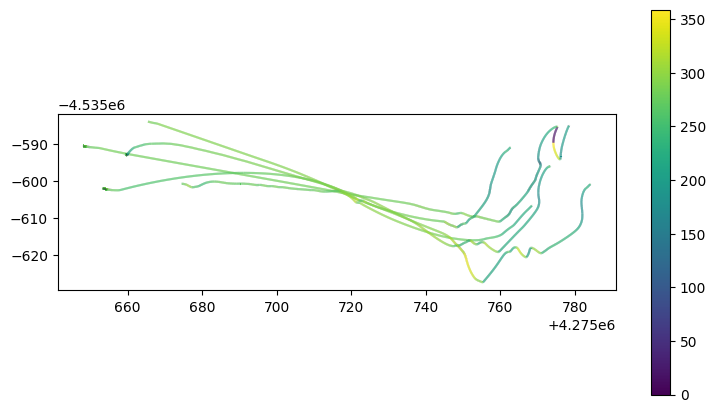

In [28]:
traj_collection.add_direction()
traj_collection.plot(column='direction', legend=True, figsize=(9,5))

## location

In [29]:
traj_collection.get_start_locations()

,t,X,Y,trajectory_id,geometry,speed,direction
0,1970-01-01 00:14:14.154,150.673586,-33.724223,1,POINT (4275762.746 -4535591.044),0.064853,286.693248
1,1970-01-01 00:14:14.200,150.673694,-33.724133,2,POINT (4275778.415 -4535585.249),0.055364,45.49196
2,1970-01-01 00:14:14.267,150.673694,-33.724313,3,POINT (4275768.509 -4535606.704),0.009024,138.073969
3,1970-01-01 00:14:14.267,150.673802,-33.724223,4,POINT (4275784.172 -4535600.927),0.029118,100.166848
4,1970-01-01 00:14:14.267,150.673694,-33.724224,5,POINT (4275773.414 -4535596.079),0.129013,212.147698


In [30]:

traj_collection.get_end_locations()

,t,X,Y,trajectory_id,geometry,speed,direction
0,1970-01-01 00:21:56.333,150.672633,-33.724587,1,POINT (4275648.101 -4535590.628),0.002041,79.085276
1,1970-01-01 00:21:56.333,150.672752,-33.724486,2,POINT (4275665.463 -4535584.119),0.236453,283.689712
2,1970-01-01 00:21:56.333,150.67272,-33.724649,3,POINT (4275653.351 -4535602.037),0.003765,86.461331
3,1970-01-01 00:21:56.333,150.672891,-33.724573,4,POINT (4275674.509 -4535600.803),0.272174,267.527754
4,1970-01-01 00:21:56.333,150.672736,-33.724567,5,POINT (4275659.422 -4535593.027),0.006008,260.621834


## segments between times

<Axes: >

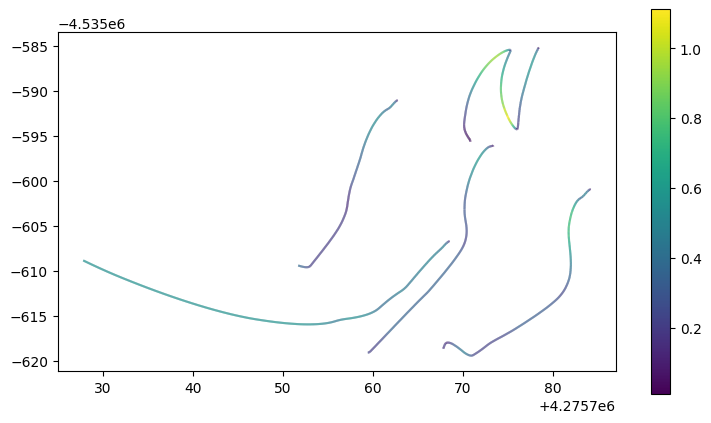

In [31]:
t1 = datetime(1970,1,1,0,14,14)
t2 = datetime(1970,1,1,0,15,44)
traj_collection.get_segments_between(t1, t2).plot(column='speed', legend=True, figsize=(9,5))

# Demos

## Demo1: total distance and avg speed

compute the total distance and average speed of each trajectory.

In [41]:
summary = []
for traj in traj_collection.trajectories:
    #############  code below  #############
    length = traj.get_length()  # 單位為公尺

    # 計算持續時間（秒）
    duration = (traj.get_end_time() - traj.get_start_time()).total_seconds()

    # 計算平均速度（m/s），避免除以 0
    avg_speed = length / duration if duration > 0 else 0.0

    #############  code above  #############
    summary.append({
        "trajectory_id": traj.id,
        "total_distance(m)": length,
        "avg_speed(m/s)": avg_speed,
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

   trajectory_id  total_distance(m)  avg_speed(m/s)
0              1         128.528875        0.278093
1              2         151.331203        0.327462
2              3         123.097732        0.266407
3              4         139.385966        0.301658
4              5         136.763001        0.295982


## Demo2: Mark all the stop points on plot

mark all point whose speed < 0.1 m/s with red dot

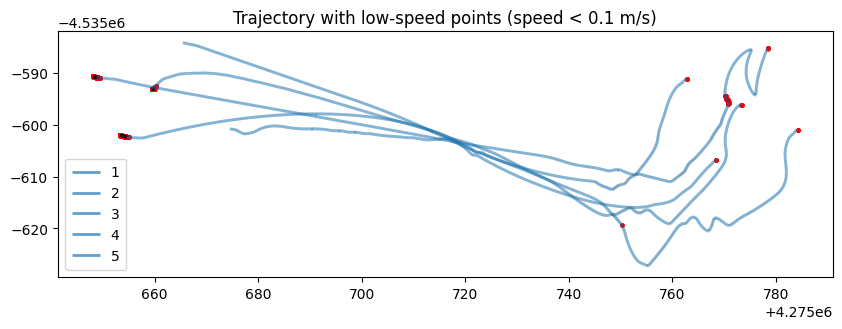

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))
for traj in traj_collection.trajectories:
    traj.plot(ax=ax, linewidth=2, alpha=0.7, label=traj.id)
    #############  code below  #############
    df = traj.df
    low_speed_points = df[df['speed'] < 0.1]['geometry']
    
    low_speed_points.plot(ax=ax, color='red', marker='o', markersize=5, label=None)

    #############  code above  #############

ax.legend(loc='lower left',borderpad=0.5)
plt.title('Trajectory with low-speed points (speed < 0.1 m/s)')
plt.show()

## Demo3: Mark all the turning point on plot

Mark all the turning point (direction change > 45 degrees & move < 2 meters within 5 tracked point)

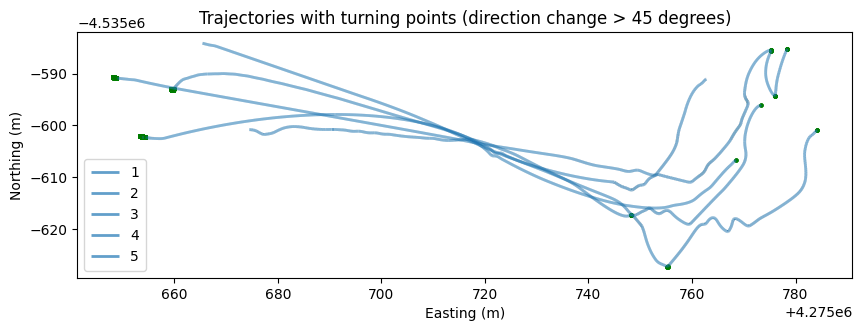

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))
turning_points = {}
TURN_ANGLE_THRESHOLD = 45
MOVE_DISTANCE_THRESHOLD = 2
SHIFT = 5

for traj in traj_collection.trajectories:
    #############  code below  #############
    df = traj.df.reset_index(drop=True)  # 取得 GeoDataFrame，並重設 index
    turning_geoms = []

    for i in range(SHIFT, len(df) - SHIFT):
        dir1 = df.loc[i - SHIFT, 'direction']
        dir2 = df.loc[i + SHIFT, 'direction']

        # 計算角度變化（補償 360 度循環）
        angle_diff = abs(dir1 - dir2)
        if angle_diff > 180:
            angle_diff = 360 - angle_diff

        # 計算移動距離
        p1 = df.loc[i - SHIFT, 'geometry']
        p2 = df.loc[i + SHIFT, 'geometry']
        distance = p1.distance(p2)

        if angle_diff > TURN_ANGLE_THRESHOLD and distance < MOVE_DISTANCE_THRESHOLD:
            turning_geoms.append(df.loc[i, 'geometry'])

    # 畫出軌跡
    traj.plot(ax=ax, linewidth=2, alpha=0.7, label=traj.id)

    # 畫出轉彎點
    if turning_geoms:
        gpd.GeoSeries(turning_geoms).plot(ax=ax, color='green', marker='o', markersize=5, label=None)

    #############  code above  #############

ax.legend(loc='lower left',borderpad=0.5)
plt.title('Trajectories with turning points (direction change > 45 degrees)')
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.show()
